# **DIABETIC RETINOPATHY DETECTION**

### This project uses the following notebooks used to create the models detecting the retina disease in diabetic patients.

1. 1_CNN_Model_Baseline.ipynb - testing on small subset of images across 5 different stages
2. 2_CNN_Model.ipynb - binary classification of final dataset, created baseline and second iteration 
3. 3_TL_MobileNet_Model.ipynb (current) - binary classification of final dataset using transfer learning with MobileNet V2 model
4. 4_Yolov5_Model.ipynb (current) - further experimentation to detect multiclassification on different stages of diabetic retinopathy as next steps.


### 4_Yolov5_Model.ipynb (current) - Using a pretrained model Yolov5 for computer vision.

Yolov5 is an open source single stage object oriented detection program created by Ultalytics @ pytorch. To use yolov5 we need to import the repository, and other dependencies.

This notebook uses 5 classes for detection. The images are balanced between 1000-1500 in each class. All 2500 original images have been manually labled in Roboflow and augmented in roboflow and used in the statements below.

A yaml file (config) is used to indicate the labels.


## 1. Imports and Mount Drive

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2. Setup YOLOv5 from github

In [ ]:
# Set up 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 6290, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 6290 (delta 40), reused 59 (delta 24), pack-reused 6205
Receiving objects: 100% (6290/6290), 8.54 MiB | 25.05 MiB/s, done.
Resolving deltas: 100% (4294/4294), done.
/content/yolov5
     |████████████████████████████████| 645kB 14.6MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## 3. Import PyTorch - used for display images

In [ ]:
# dependencies for YOLOV5
import torch
from IPython.display import Image, clear_output  # to display images
# show all is good 
clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Setup complete. Using torch 1.8.1+cu101 (Tesla P100-PCIE-16GB)


## 4. Wandb setup - to track the model and the performance

In [ ]:
%pip install wandb
!wandb login  # use 'wandb disabled' or 'wandb enabled' to disable or enable

     |████████████████████████████████| 1.8MB 15.2MB/s 
     |████████████████████████████████| 102kB 14.0MB/s 
     |████████████████████████████████| 174kB 60.4MB/s 
     |████████████████████████████████| 133kB 55.5MB/s 
     |████████████████████████████████| 71kB 11.8MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=502a87315866acdd39d20301b9c449ae0ecf3e329d165eeb359082395933539c
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=2243c0ce40a63ed34df9ebc76be7f7426b571d8e6c36cba6d8c8fc5644fe3df3
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: 

## Import 685 Augmented images from RoboFlow

In [ ]:
##Roboflow Import
!curl -L "https://app.roboflow.com/ds/sjz9VhO5BQ?key=UkCULWFN1Y" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1280      0 --:--:-- --:--:-- --:--:--  1278
100 3865k  100 3865k    0     0  3996k      0 --:--:-- --:--:-- --:--:-- 3996k
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/162_left_jpeg.rf.56243d070379fb165f1e6f18a2f5b757.jpg  
 extracting: test/images/174_left_jpeg.rf.f655dd521507db4f8bee1bfb247163e6.jpg  
 extracting: test/images/1867_left_jpeg.rf.1de4db8cccf78583a3679fd9730171bd.jpg  
 extracting: test/images/229_left_jpeg.rf.f539f447eac0d72454f33e6c9ffd285b.jpg  
 extracting: test/images/2382_left_jpeg.rf.0deedc170de99291a539f796f519818c.jpg  
 extracting: test/images/244_left_jpeg.rf.a1d8e1380c10dd2773fd09ab81051d01.jpg  
 extracting: test/images/3060_left_jpeg.rf.8e387c9c3

## 6. Run Yolov5 Train.py - for training the model with train set - 200 epochs

In [ ]:
!python train.py --img 244 --batch 64 --epochs 200 --data drlabels.yaml --weights yolov5s.pt

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-68-gb18ca31 torch 1.8.1+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=64, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='./data/drlabels.yaml', device='', entity=None, epochs=200, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[244, 244], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp3', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=64, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-05-06 02:06:44.113532: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Succes

## 7. Validate the results for 200 epochs

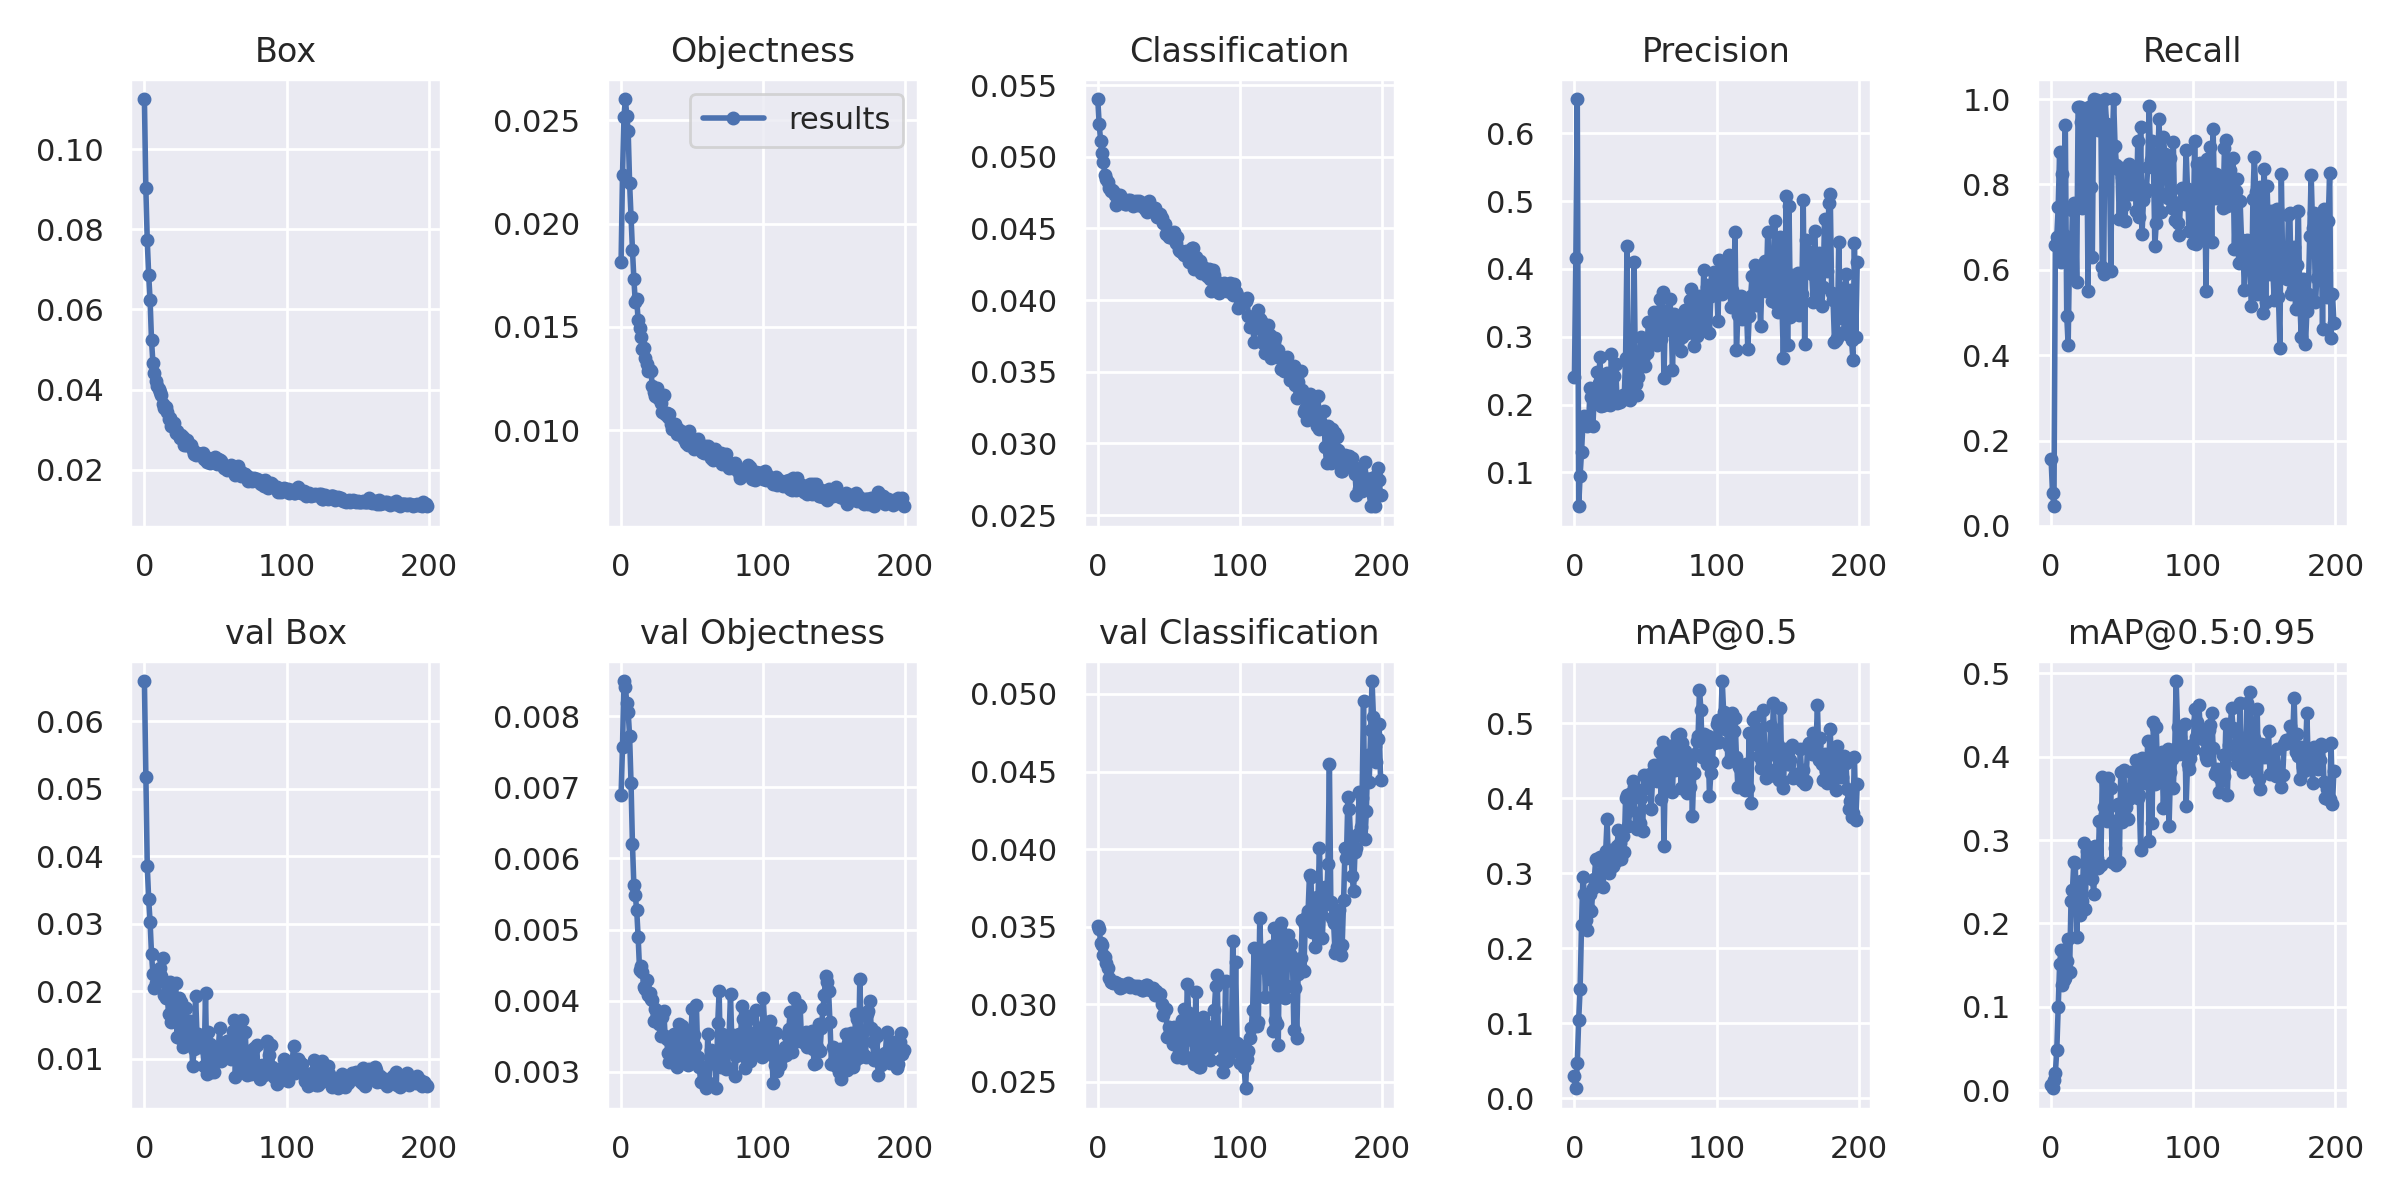

In [ ]:
#Plotting YoloV5 Performance
Image(filename='./runs/train/exp3/results.png', width=1500)

## 8. Run Yolov5 detect.py - for testing the model with test images for 200 epochs

In [ ]:
# using detect.py to run predictions

!python detect.py --weights /content/yolov5/runs/train/exp3/weights/best.pt --img 244 --conf 0.05 --source test/images/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.05, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=244, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='test/images/', update=False, view_img=False, weights=['/content/yolov5/runs/train/exp3/weights/best.pt'])
YOLOv5 🚀 v5.0-68-gb18ca31 torch 1.8.1+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
Model Summary: 224 layers, 7064698 parameters, 0 gradients, 16.4 GFLOPS
image 1/29 /content/yolov5/test/images/162_left_jpeg.rf.56243d070379fb165f1e6f18a2f5b757.jpg: 256x256 1 0, Done. (0.011s)
image 2/29 /content/yolov5/test/images/174_left_jpeg.rf.f655dd521507db4f8bee1bfb247163e6.jpg: 256x256 1 0, 1 2, 1 3, Done. (0.011s)
image 3/29 /content/yolov5/test/images/1867_left_jpeg.rf.1de4db8cccf78583a3679fd9730171bd.jpg: 256x256 1 0, Done. (0.011s)
image 4/29 /content/yolov5/test/images/229_le

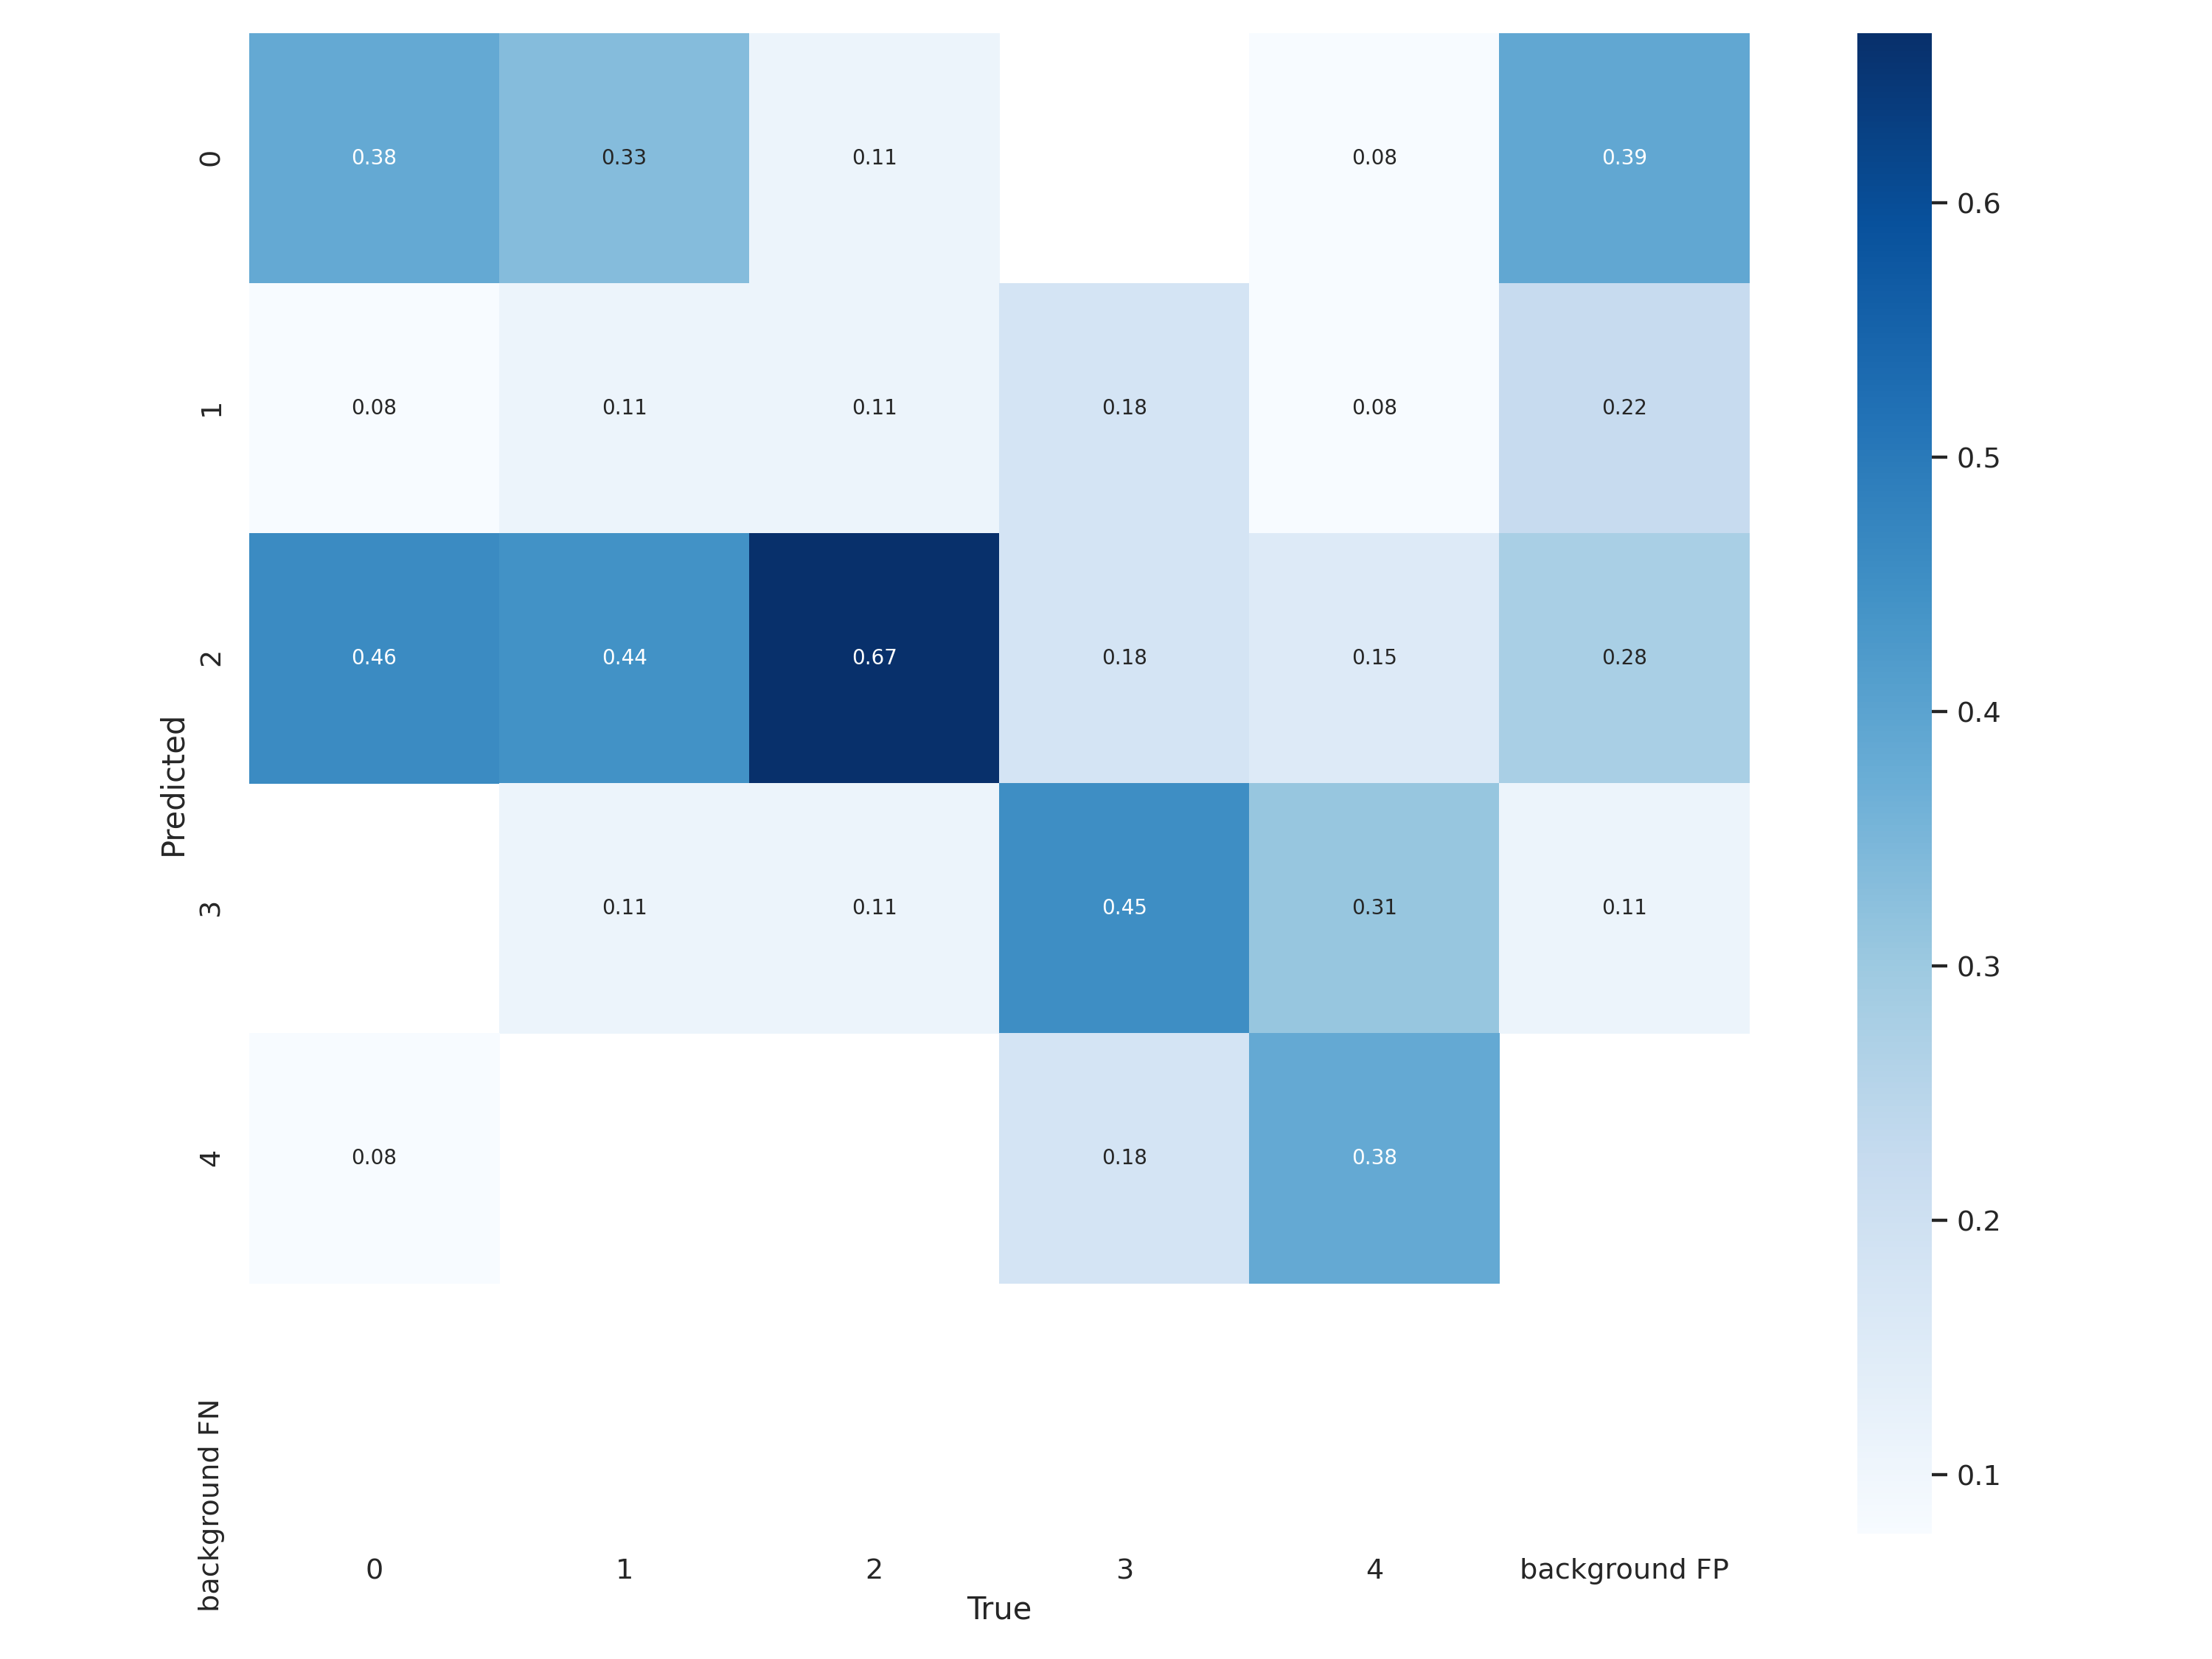

In [ ]:
Image(filename='./runs/train/exp3/confusion_matrix.png', width=1500)

In [ ]:
#This will save your YoloV5 directory with model, weights, and results, to your mounted Google Drive
%cp -r "/content/yolov5/" "/content/drive/MyDrive/Colab Notebooks/Capstone/yolov5_1000"

## Run Yolov5 for 1000 epochs

In [ ]:
!python train.py --img 244 --batch 64 --epochs 1000 --data drlabels.yaml --weights yolov5s.pt

Streaming output truncated to the last 5000 lines.
                 all          56          55       0.189       0.874       0.254       0.155

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    11/999      2.6G   0.03864   0.01619   0.04758    0.1024        68       256
               Class      Images      Labels           P           R      mAP@.5
                 all          56          55       0.186       0.984       0.258       0.197

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    12/999      2.6G    0.0382   0.01512   0.04726    0.1006        74       256
               Class      Images      Labels           P           R      mAP@.5
                 all          56          55       0.184       0.606       0.237       0.133

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    13/999      2.6G   0.03748   0.01483    0.0466    0.0989        72       256
               Clas

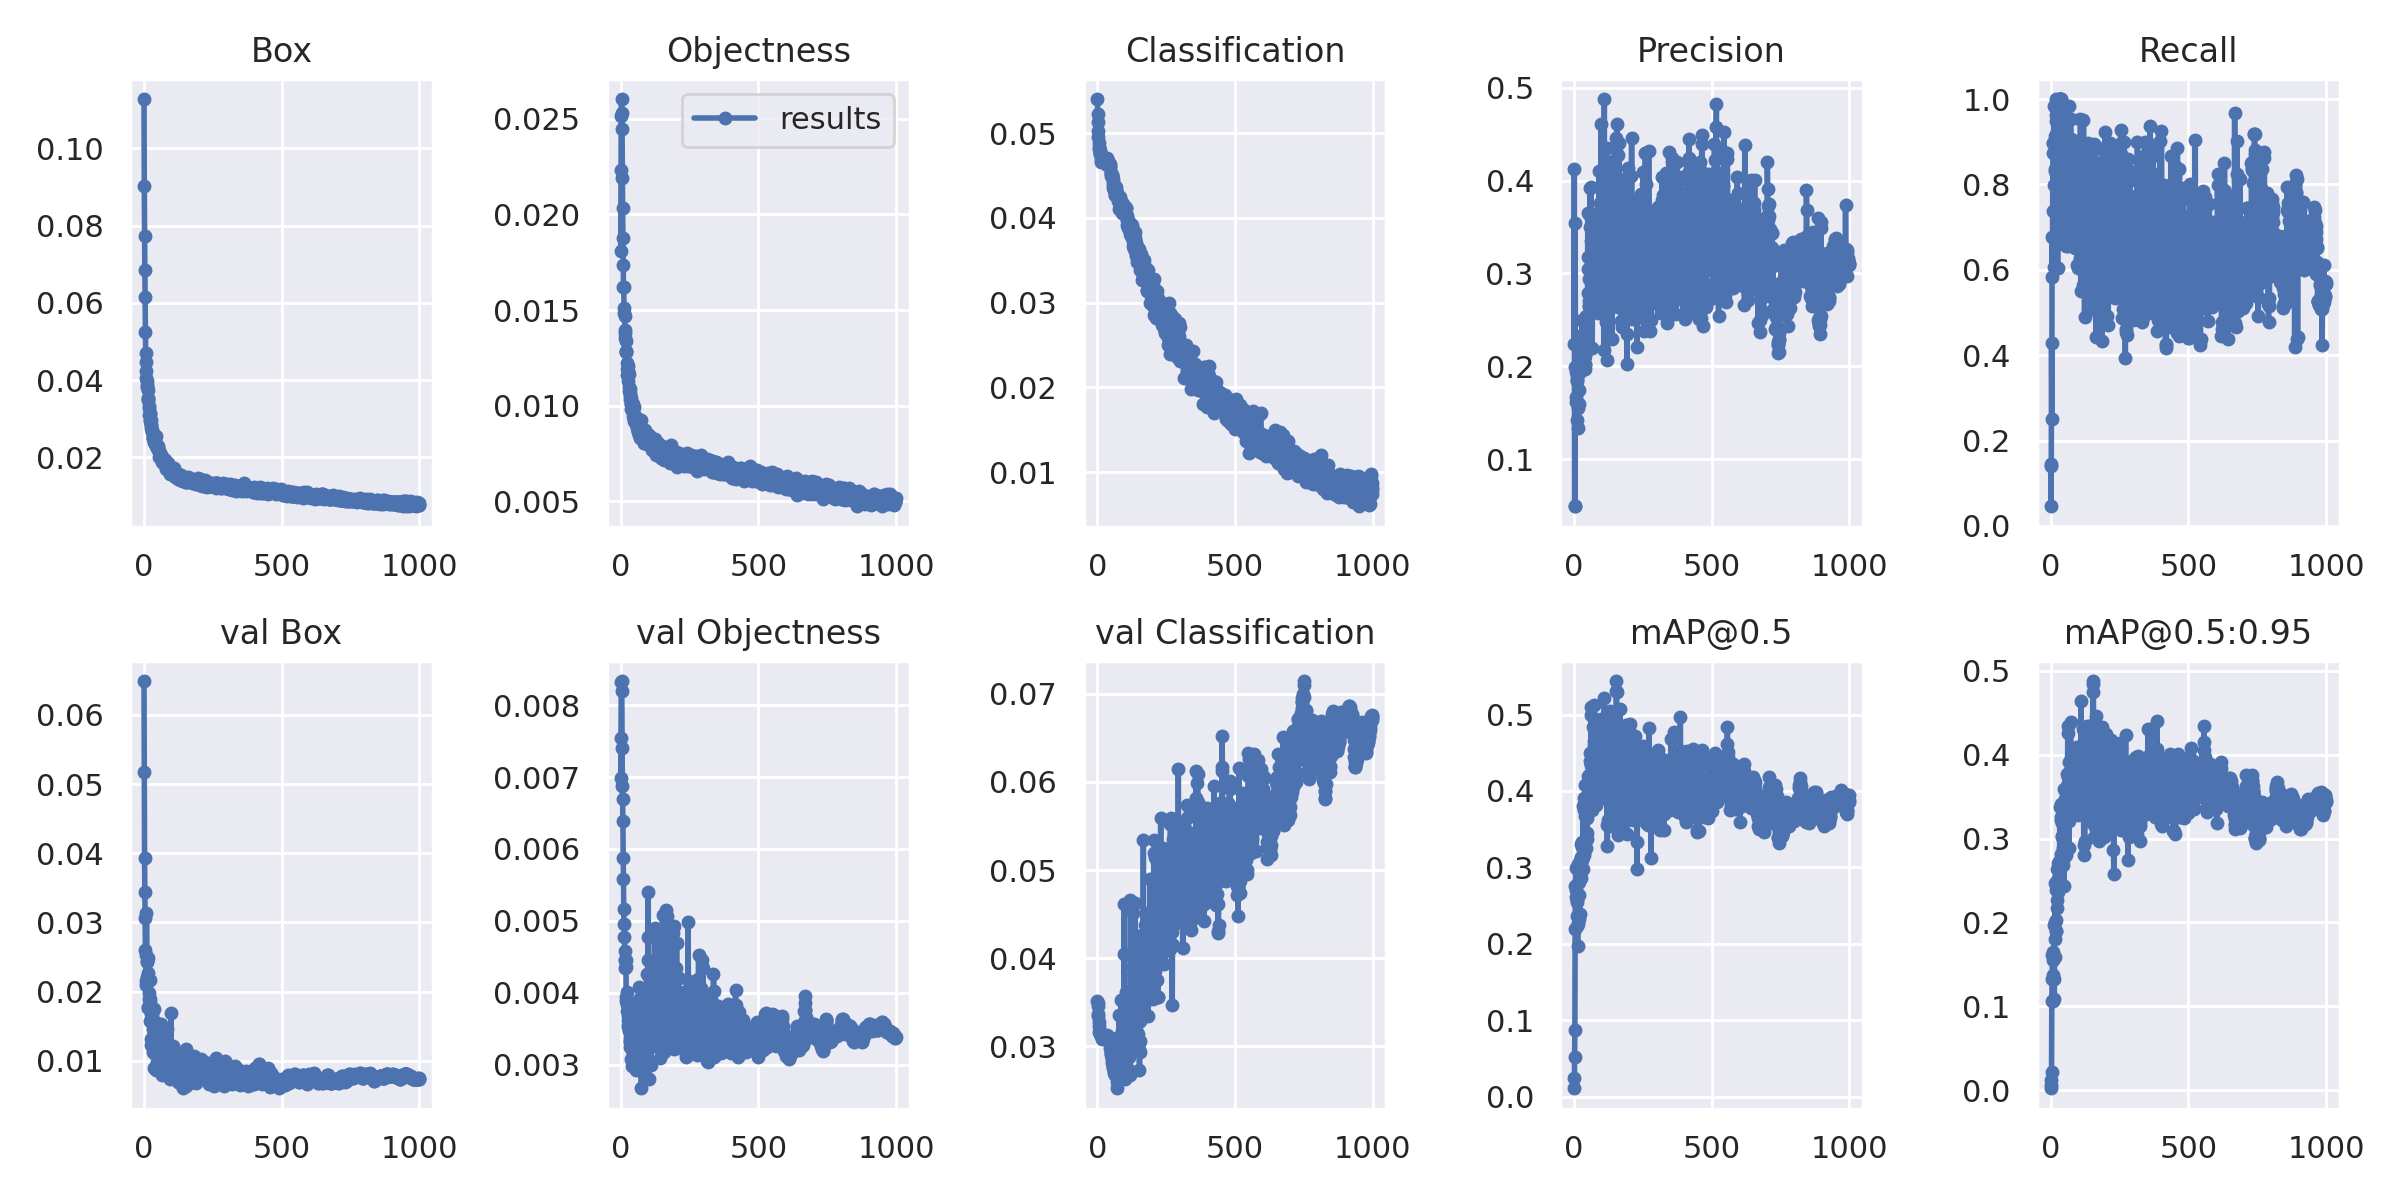

In [ ]:
#Plotting YoloV5 Performance
Image(filename='./runs/train/exp4/results.png', width=1800)

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp4/weights/best.pt --img 244 --conf 0.05 --source test/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.05, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=244, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='test/images', update=False, view_img=False, weights=['/content/yolov5/runs/train/exp4/weights/best.pt'])
YOLOv5 🚀 v5.0-68-gb18ca31 torch 1.8.1+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
Model Summary: 224 layers, 7064698 parameters, 0 gradients, 16.4 GFLOPS
image 1/29 /content/yolov5/test/images/162_left_jpeg.rf.56243d070379fb165f1e6f18a2f5b757.jpg: 256x256 1 0, 1 1, Done. (0.010s)
image 2/29 /content/yolov5/test/images/174_left_jpeg.rf.f655dd521507db4f8bee1bfb247163e6.jpg: 256x256 1 1, 1 2, Done. (0.010s)
image 3/29 /content/yolov5/test/images/1867_left_jpeg.rf.1de4db8cccf78583a3679fd9730171bd.jpg: 256x256 1 0, 1 1, Done. (0.010s)
image 4/29 /content/yolov5/test/images/22

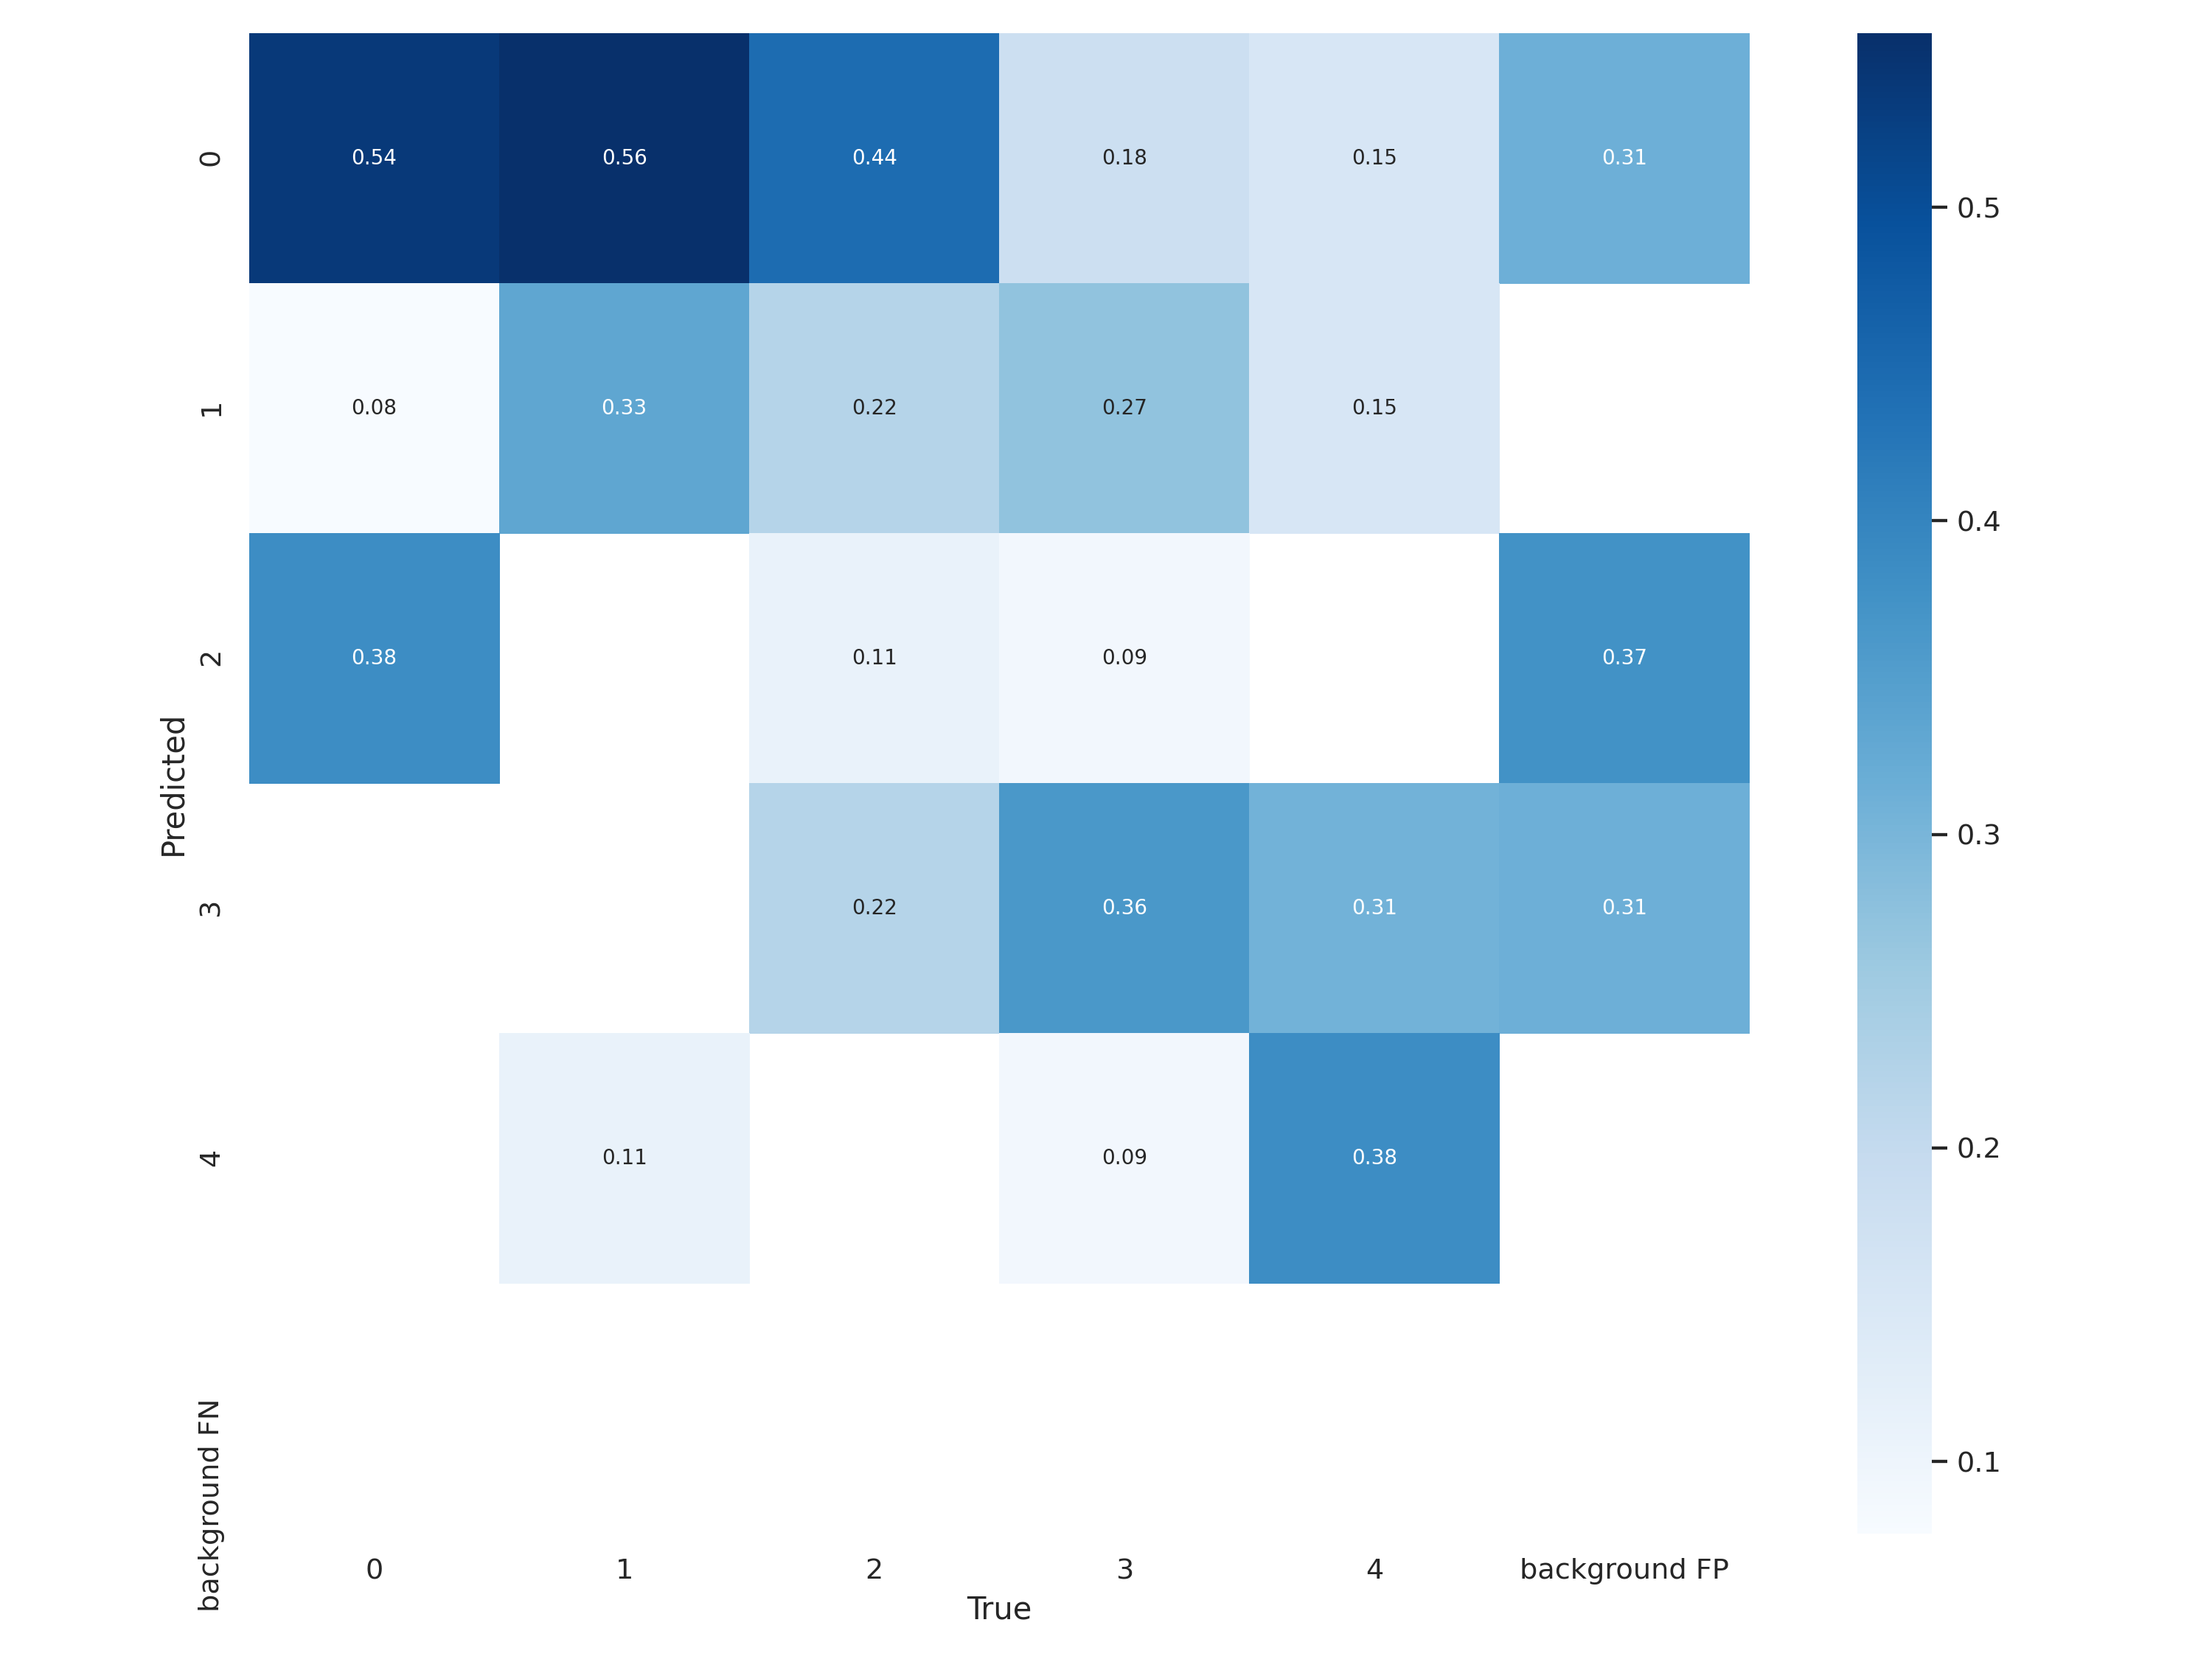

In [ ]:
Image(filename='./runs/train/exp4/confusion_matrix.png', width=1800)

## Next iteration: Import of 6276 augmented images from roboflow

In [ ]:
##Roboflow Import importing 6297 images for our train, validdation and test
!curl -L "https://app.roboflow.com/ds/6jn2yMrFPA?key=6WNpWJloh0" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/labels/208_left_jpeg.rf.3c7d7a19511d1b72336b1338575a1a53.txt  
 extracting: train/labels/208_left_jpeg.rf.bfaeb253c6ab6de0683c236d14d37d3b.txt  
 extracting: train/labels/2094_left_jpeg.rf.5546e76b45a95497281fafb64ce9c9dc.txt  
 extracting: train/labels/2094_left_jpeg.rf.a1ae4b70847c7c832e842df89ea7c25d.txt  
 extracting: train/labels/2094_left_jpeg.rf.d0e9e7b1a1d7e94c8b7b8b484a838675.txt  
 extracting: train/labels/20_left_jpeg.rf.2d63d2613afd24ec48807067fc448d06.txt  
 extracting: train/labels/20_left_jpeg.rf.7ee5de775eeaf8a83020f261df85061a.txt  
 extracting: train/labels/20_left_jpeg.rf.9816f9980d69f3f560aad54526356936.txt  
 extracting: train/labels/20_right_jpeg.rf.1146a97b880d3383aab4ee67cf054600.txt  
 extracting: train/labels/20_right_jpeg.rf.5f356e5ac26dced3e2012881e7f014b3.txt  
 extracting: train/labels/20_right_jpeg.rf.b4435f3b24d05068efded0bd3c4ad192.txt  
 extracting: train/labels/20d5fdd450ae_jpg.rf.0

In [ ]:
# to train on the training set of images, drlabels is the config file
!python train.py --img 640 --batch 64 --epochs 1000 --data drlabels.yaml --weights yolov5s.pt


github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-90-g06372b1 torch 1.8.1+cu101 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=64, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='./data/drlabels.yaml', device='', entity=None, epochs=1000, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=64, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-05-13 21:35:04.453623: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Succe

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp4/weights/best.pt --img 640 --conf 0.25 --source validation/images

## Graphs and detect

In [ ]:
#Plotting YoloV5 Performance
Image(filename='./runs/train/exp2/results.png', width=1800)

In [ ]:
# run the detect to test the predictions
!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source test/images

In [ ]:
#load the confusion matrix
Image(filename='./runs/train/exp2/confusion_matrix.png', width=1800)

## Summary

Initiated Yolov5 to detect 5 classes for 6296 total images, even after 16 hours, the model only executed 700 epochs. The results can be viewed at wandb.ai - the tool that tracks the indivudal runs and provides graphical reprensentation for the scores and learning curve.